In [4]:
import cv2
import numpy as np
import os
import statistics
import matplotlib as plt
# Load the resized picture and mask
#picture = cv2.imread(r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/Blue_vail")

In [16]:
import cv2
import numpy as np
import os

def measure_streaks(image): #feature 5, returns a formula
    # Convert to grayscale and apply threshold
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

    # Find contours in the image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Compute area of the skin lesion
    lesion_area = cv2.contourArea(contours[0])

    # Compute perimeter of the border
    border_perimeter = cv2.arcLength(contours[0], True)

    print('Lesion area:', lesion_area)
    print('Border perimeter:', border_perimeter)

    irregularity = (border_perimeter ** 2) / 4 * np.pi * lesion_area
    #print('Irregularity:', irregularity)
    
    return irregularity
    # threshold = 53133764405
    # if irregularity > threshold:
    #     return 1
    # else:
    #     return 0

# Directories containing the pictures
directory1 = r"/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/cancer"
directory2 = r"/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/no_cancer"

# Lists to store the results
regression = []
no_regression= []

# Function to process a directory
def process_directory(directory, results):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a picture
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the picture
            picture_path = os.path.join(directory, filename)
            picture = cv2.imread(picture_path)

            # Process the picture using measure_blue_veil function
            result = measure_streaks(picture)

            # Append the result to the list
            results.append(result)

# Process the first directory
process_directory(directory1, regression)

# Process the second directory
process_directory(directory2, no_regression)

# Print the results
print("Results from directory 1:", regression)
print("Results from directory 2:", no_regression)


Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perimeter: 1020.0
Lesion area: 65025.0
Border perime

In [10]:
# Calculate the means
mean_results1 = np.mean(regression)
mean_results2 = np.mean(no_regression)
standart_devresult1 = round(np.std(regression),2)
print(f"The standart deviation of cancer is : {standart_devresult1}")
standart_devresult2 = round(np.std(no_regression),2)
print(f"The standart deviation of no cancer is : {standart_devresult2}")
# Round the means to 2 decimal places
rounded_mean_results1 = round(mean_results1, 2)
rounded_mean_results2 = round(mean_results2, 2)


# Print the rounded means
print("Mean of results1 (cancer):", rounded_mean_results1)
print("Mean of results2 (No cancer):", rounded_mean_results2)


The standart deviation of cancer is : 0.0
The standart deviation of no cancer is : 15120981985.88
Mean of results1 (cancer): 53133764404.15
Mean of results2 (No cancer): 48410763123.78


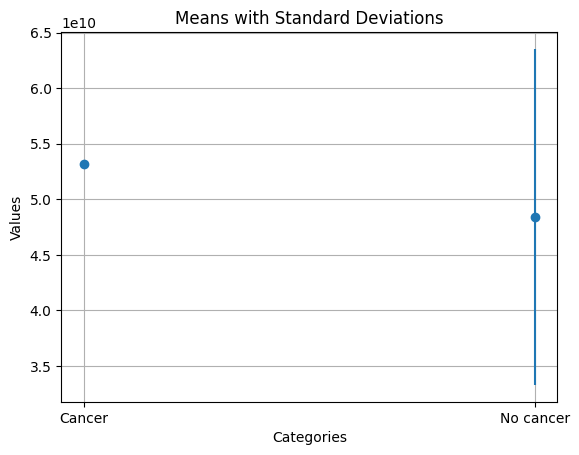

In [11]:
import matplotlib.pyplot as plt

# Data
means = [53133764404.15, 48410763123.78]
std_devs = [0.0, 15120981985.88]
categories = ['Cancer', 'No cancer']

# Plotting
plt.errorbar(categories, means, yerr=std_devs, fmt='o')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Means with Standard Deviations')
plt.grid(True)

# Display the plot
plt.show()


In [36]:
# Find the minimum value in results1 (blue veil)
min_value_results1 = min(results1)

# Print the minimum value
print("Minimum value in results1 (Blue Veil):", min_value_results1)


Minimum value in results1 (Blue Veil): 165


In [11]:
def measure_pigment_network(image): #feature 1
    
    # Convert the image to the LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Extract the L, A, and B channels from the LAB image
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Apply contrast stretching to enhance the L channel
    enhanced_l_channel = cv2.equalizeHist(l_channel)

    # Perform thresholding on the enhanced L channel to obtain a binary mask
    _, binary_mask = cv2.threshold(enhanced_l_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply morphological operations to remove noise and refine the binary mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    morphological_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

    # Convert the morphological mask to a color image
    color_mask = cv2.cvtColor(morphological_mask, cv2.COLOR_GRAY2BGR)

    # Combine the color mask with the original image to highlight the regions of interest
    result = cv2.bitwise_and(image, color_mask)

    # Calculate the percentage of pigment network coverage
    total_pixels = np.prod(binary_mask.shape[:2])
    pigment_pixels = np.count_nonzero(binary_mask)
    coverage_percentage = (pigment_pixels / total_pixels) * 100

    #print("Pigment Network Coverage: {:.2f}%".format(coverage_percentage))
    #if coverage_percentage > 50:
        #return 1
    #else:
        #return 0
    return coverage_percentage

In [ ]:
# Directories containing the pictures

directory3 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/pigment_network"
directory4 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/no_pigment_network"

# Lists to store the results
pigment_network = []
no_pigment_network= []

# Function to process a directory
def process_directory(directory, results):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a picture
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the picture
            picture_path = os.path.join(directory, filename)
            picture = cv2.imread(picture_path)

            # Process the picture using measure_blue_veil function
            result = measure_blue_veil(picture)

            # Append the result to the list
            results.append(result)

# Process the first directory
process_directory(directory1, blue_veil)

# Process the second directory
process_directory(directory2, no_blue_veil)

# Print the results
print("Results from directory 1:", blue_veil)
print("Results from directory 2:", no_blue_veil)
